In [119]:
# Based on Damien's Software Carpentry workshop
# https://carpentrieslab.github.io/python-aos-lesson/02-visualisation/index.html
# and
# https://nordicesmhub.github.io/climate-data-tutorial/03-visualization-python/
#and
# https://github.com/hdrake/cmip6-temperature-demo/blob/master/notebooks/00_calculate_simulated_global_warming.ipynb
# and
# https://github.com/hdrake/cmip6-temperature-demo

#https://xarray-test.readthedocs.io/en/latest/plotting.html
# https://www.bookstack.cn/read/xarray-v0.12.3/213e3e31ef58c5df.md#plotting
    
# Install packages (in bash/ Terminal)
# conda install xarray
# conda install cartopy
# conda install matplotlib
# conda install numpy

# Import required packages for reading netcdf data and plotting
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

#Next: https://carpentrieslab.github.io/python-aos-lesson/03-functions/index.html
#Note: pwd command checksyour current directory

In [191]:
cd '/Users/ktokarska/Desktop/ssp119_ng'

/Users/ktokarska/Desktop/ssp119_ng


In [192]:
ls

global_tas_ann_CAMS-CSM1-0_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_EC-Earth3-Veg_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_EC-Earth3_hist_ssp119_r4i1p1f1_g025.nc
global_tas_ann_GFDL-ESM4_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_IPSL-CM6A-LR_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_MIROC-ES2L_hist_ssp119_r1i1p1f2_g025.nc
global_tas_ann_MIROC6_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_MRI-ESM2-0_hist_ssp119_r1i1p1f1_g025.nc
global_tas_ann_UKESM1-0-LL_hist_ssp119_r1i1p1f2_g025.nc
tas_ann_CAMS-CSM1-0_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_EC-Earth3-Veg_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_EC-Earth3_hist_ssp119_r4i1p1f1_g025.nc
tas_ann_GFDL-ESM4_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_IPSL-CM6A-LR_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_MIROC-ES2L_hist_ssp119_r1i1p1f2_g025.nc
tas_ann_MIROC6_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_MRI-ESM2-0_hist_ssp119_r1i1p1f1_g025.nc
tas_ann_UKESM1-0-LL_his

In [246]:
#Plotting maps (using spatial files)
#Specify file name for one model (e.g. model 'CanESM5') 
access_tas_file = 'tas_ann_CanESM5_hist_ssp119_r1i1p1f1_g025.nc'

In [247]:
#load the file into xArray data structure
dset = xr.open_dataset(access_tas_file)

In [248]:
#View the temperature variable
#print(dset['tas'])
#or
print(dset.tas)

<xarray.DataArray 'tas' (time: 251, lat: 72, lon: 144)>
[2602368 values with dtype=float64]
Coordinates:
  * time     (time) object 1850-07-01 06:00:00 ... 2100-07-01 06:00:00
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    original_name:  ST
    history:        degctok 2019-04-30T17:32:17Z altered by CMOR: Treated sca...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella


In [249]:
#check units
dset['tas'].attrs['units']

'K'

In [251]:
#convert units to Celcius
dset.tas.data = dset.tas.data - 273.15
dset.tas.attrs['units'] = 'Celcius' 

In [252]:
#check units again
dset['tas'].attrs['units']

'Celcius'

In [253]:
#check long name
dset['tas'].attrs['long_name']

'Near-Surface Air Temperature'

In [201]:
#convert time-dimension in te file to make it possible to plot
datetimeindex = dset.indexes['time'].to_datetimeindex()
print(datetimeindex)

DatetimeIndex(['1850-07-01 06:00:00', '1851-07-01 06:00:00',
               '1852-07-01 06:00:00', '1853-07-01 06:00:00',
               '1854-07-01 06:00:00', '1855-07-01 06:00:00',
               '1856-07-01 06:00:00', '1857-07-01 06:00:00',
               '1858-07-01 06:00:00', '1859-07-01 06:00:00',
               ...
               '2091-07-01 06:00:00', '2092-07-01 06:00:00',
               '2093-07-01 06:00:00', '2094-07-01 06:00:00',
               '2095-07-01 06:00:00', '2096-07-01 06:00:00',
               '2097-07-01 06:00:00', '2098-07-01 06:00:00',
               '2099-07-01 06:00:00', '2100-07-01 06:00:00'],
              dtype='datetime64[ns]', length=251, freq=None)


/Users/ktokarska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  


In [202]:
#replace with timeindex to make it possible to plot time-series
dset['time'] = datetimeindex

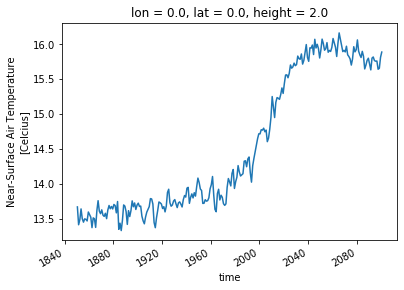

In [203]:
#plot raw temperature time-series
dset.tas.plot()

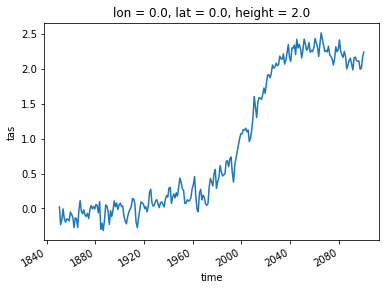

In [217]:
#Plot time series anomaly (change) with respect to years 1850-1900
temperature_change_1850_1900 = (
    dset.tas.sel(time=slice('1850-07-01','2100-07-01')) -
    dset.tas.sel(time=slice('1850-07-01','1950-07-01')).mean(dim='time')).compute()

temperature_change_1850_1900.plot()

Text(0.5, 28.547754037844385, 'Year')

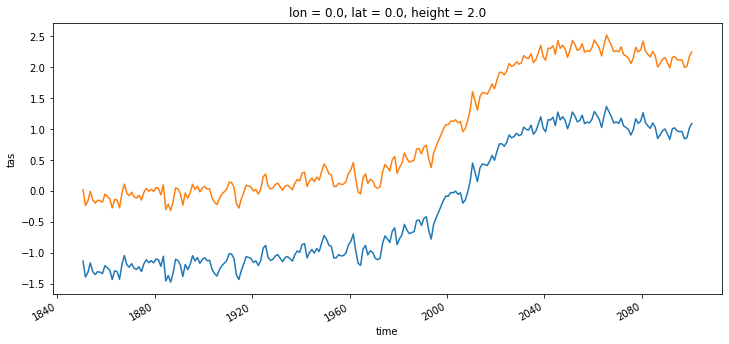

In [245]:
#Time series anomaly with respect to years 1995-2014
temperature_change_1995_2100 = (dset.tas.sel(time=slice('1850-07-01','2100-07-01')) -
    dset.tas.sel(time=slice('1995-07-01','2014-07-01')).mean(dim='time')).compute()

# Prepare the figure
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111)

temperature_change_1995_2100.plot()
ax2.set_ylabel("Temperautre change [°C]")
ax2.set_xlabel("Year")

temperature_change_1850_1900.plot()
ax1.set_ylabel("Temperautre change [°C]")
ax1.set_xlabel("Year")

#save figure
# plt.savefig("test.pdf")

In [18]:
#View the temperature variable
#print(dset['tas'])
print(dset.tas)

<xarray.DataArray 'tas' (time: 1128, lat: 96, lon: 192)>
[20791296 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 ... 2099-12-16T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2018-09-21T14:34:11Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


In [35]:
#convert units to Celcius
dset.tas.data = dset.tas.data - 273.15
dset.tas.attrs['units'] = 'Celcius' 

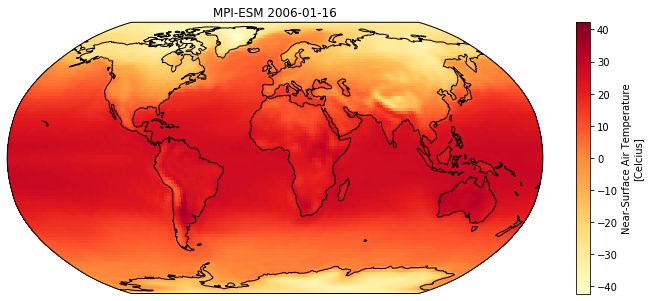

In [101]:
#plot the climatology map
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)
q = dset['tas'].sel(time='2006-01-16').plot(ax=ax, cmap='YlOrRd', transform = geo) # plot a colormap in transformed coordinates
ax.coastlines()

#Add title with the model name
title = '%s 2006-01-16' %(dset.attrs['model_id'])
plt.title(title)

plt.show()
#plt.title('Patterns of global warming',fontsize=16, ha='center');
#plt.savefig('../figures/historical_warming_patterns.png',dpi=100,bbox_inches='tight')

#Choose a different color map here:
# https://matplotlib.org/tutorials/colors/colormaps.html

In [30]:
print(dset.tas.time)

<xarray.DataArray 'time' (time: 1128)>
array(['2006-01-16T12:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-16T12:00:00.000000000', ..., '2099-10-16T12:00:00.000000000',
       '2099-11-16T00:00:00.000000000', '2099-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-16T12:00:00 ... 2099-12-16T12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


In [40]:
#calculate climatology (average over time)  -> could be also trend, annual mean, others
clim = dset['tas'].mean('time', keep_attrs=True)
print(clim)

<xarray.DataArray 'tas' (lat: 96, lon: 192)>
array([[-46.122772, -46.126686, -46.1201  , ..., -46.096203, -46.10977 ,
        -46.120884],
       [-44.157997, -44.250145, -44.31683 , ..., -43.782112, -43.924274,
        -44.045506],
       [-43.054935, -43.176937, -43.253437, ..., -42.452473, -42.700005,
        -42.89959 ],
       ...,
       [ -9.079823,  -8.934278,  -8.799846, ...,  -9.546507,  -9.38641 ,
         -9.23133 ],
       [ -9.843157,  -9.814821,  -9.786094, ...,  -9.944571,  -9.910357,
         -9.877273],
       [-10.425282, -10.424999, -10.423923, ..., -10.427379, -10.426984,
        -10.425653]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             Celcius
    cell_methods:      time: m

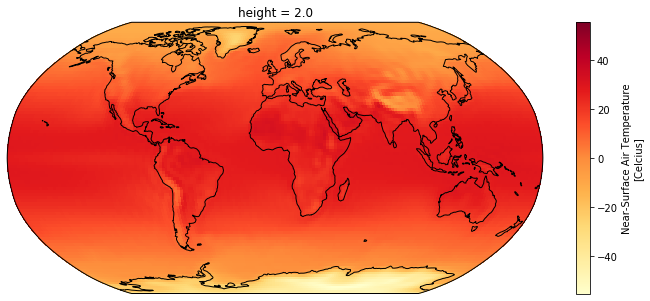

In [102]:
#Plot climatology (i.e. mean over time)

#fig = plt.figure(figsize=[12,5])
#ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=0))

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)
clim.plot(ax=ax, cmap='YlOrRd', transform = geo) # plot a colormap in transformed coordinates
ax.coastlines()

plt.show()


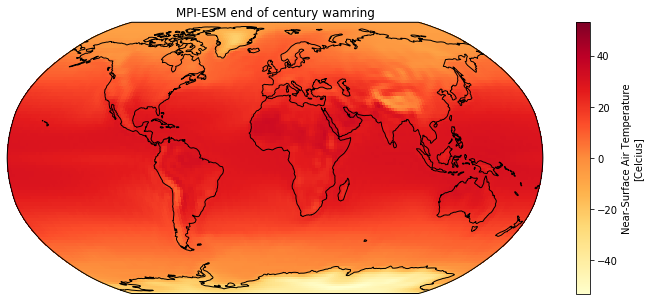

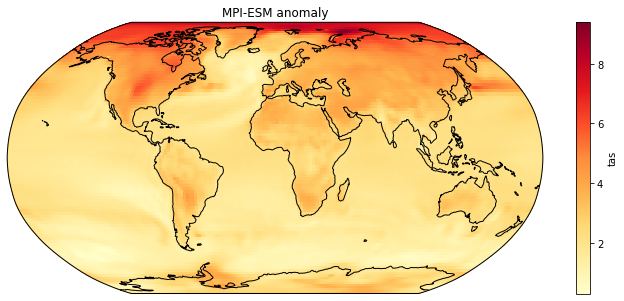

In [74]:
# Plot mean temperautre map over the end of the century
tas_last = dset.tas.sel(time=slice("2090-01-16","'2099-12-16"))
#print(tas_last)
tas_first = dset.tas.sel(time=slice("2020-01-16","'2040-12-16"))

tas_last_mean=tas_last.mean('time', keep_attrs=True)
tas_first_mean=tas_first .mean('time', keep_attrs=True)

#anomaly (difference between the first and last)
tas_anom=tas_last_mean-tas_first_mean;

#plotting end of century wamring
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=0))
tas_last_mean.plot(ax=ax, cmap='YlOrRd', transform=ccrs.PlateCarree())
ax.coastlines()
title = '%s end of century wamring' %(dset.attrs['model_id'])
plt.title(title)

#plotting anomaly
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.Robinson(central_longitude=0))
tas_anom.plot(ax=ax, cmap='YlOrRd', transform=ccrs.PlateCarree())
ax.coastlines()

title = '%s anomaly' %(dset.attrs['model_id'])
plt.title(title)

plt.show()

In [61]:
print(tas_anom)

<xarray.DataArray 'tas' (lat: 96, lon: 192)>
array([[3.076405, 3.078781, 3.080284, ..., 3.03231 , 3.05508 , 3.078152],
       [2.861809, 2.867954, 2.868961, ..., 2.882847, 2.868423, 2.86388 ],
       [2.677578, 2.663727, 2.643436, ..., 2.644932, 2.661144, 2.658669],
       ...,
       [7.911782, 7.960176, 8.0053  , ..., 7.725641, 7.78858 , 7.852916],
       [7.816179, 7.839221, 7.855202, ..., 7.750811, 7.775064, 7.792684],
       [7.817679, 7.824482, 7.826755, ..., 7.812563, 7.816744, 7.81674 ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0


In [63]:
#bad way of storing models
a=[tas_anom , tas_anom]

In [81]:
print(a)

[<xarray.DataArray 'tas' (lat: 96, lon: 192)>
array([[3.076405, 3.078781, 3.080284, ..., 3.03231 , 3.05508 , 3.078152],
       [2.861809, 2.867954, 2.868961, ..., 2.882847, 2.868423, 2.86388 ],
       [2.677578, 2.663727, 2.643436, ..., 2.644932, 2.661144, 2.658669],
       ...,
       [7.911782, 7.960176, 8.0053  , ..., 7.725641, 7.78858 , 7.852916],
       [7.816179, 7.839221, 7.855202, ..., 7.750811, 7.775064, 7.792684],
       [7.817679, 7.824482, 7.826755, ..., 7.812563, 7.816744, 7.81674 ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0, <xarray.DataArray 'tas' (lat: 96, lon: 192)>
array([[3.076405, 3.078781, 3.080284, ..., 3.03231 , 3.05508 , 3.078152],
       [2.861809, 2.867954, 2.868961, ..., 2.882847, 2.868423, 2.86388 ],
       [2.677578, 2.663727, 2.643436, ..., 2.644932, 2.661144, 2.658669],
       ..

In [88]:
#Calculate anomaly

#Visualizing warming patterns from 1890-1910 to 1990-2010
temperature_change = (
    dset['tas'].sel(time=slice('2080-01-16','2099-01-16')).mean(dim='time') -
    dset['tas'].sel(time=slice('2020-01-16','2040-01-16')).mean(dim='time')
).compute()
temperature_change.attrs.update(dset.attrs)
temperature_change = temperature_change.rename(
    r'temperature change ($^{\circ}$C) from 1890-1910 to 1990-2010'
)

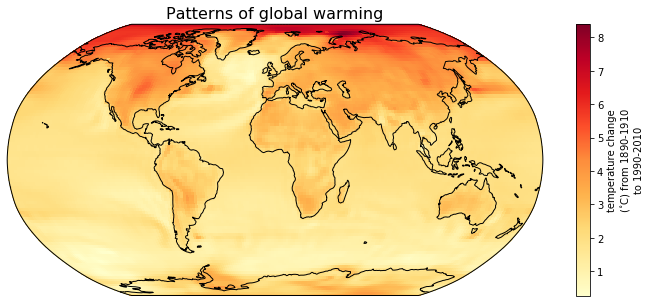

In [97]:
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree() # define origin coordinate frame

plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)
q = temperature_change.plot(ax=ax, cmap='YlOrRd', transform = geo) # plot a colormap in transformed coordinates

ax.coastlines()

plt.title('Patterns of global warming',fontsize=16, ha='center');
#plt.savefig('../figures/historical_warming_patterns.png',dpi=100,bbox_inches='tight')


In [85]:
print(a)

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 192)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 2.0
Data variables:
    tas      (lat, lon) float32 3.0764046 3.0787811 ... 7.8167443 7.81674


In [ ]:
#varnames = ['tas', 'pr', 'uas', 'vas', 'sfcWind']
#time_slice = slice('1981', '2010') # date range consistent with NCEP reanalysis long-term-mean